

<div style="padding:20px;
            color:lightcyan;
            margin:10px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color:lightcyan;
            background-color:#0e044d;
            font-family:newtimeroman;
            overflow:hidden;
            font-weight:500">Aircraft Wildlife Strikes 1990-2023</div>


<center>
<img src="https://github.com/DorobantuDiana/DS_Projects/blob/main/objects/plane&birds.jpeg?raw=true" width=600>
</center>

<a id="1"></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#0e044d;font-family:newtimeroman;color:lightcyan;font-size:160%;text-align:center;border-radius:10px 10px;">Dataset</p>  
    
Information about the dataset you can find [here](https://www.kaggle.com/datasets/dianaddx/aircraft-wildlife-strikes-1990-2023).

In [5]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"rakshitbhadoria","key":"bab289ceb2aa5aacf636aed582f03752"}'}

In [6]:
!pip install kaggle

In [7]:
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle datasets download -d dianaddx/aircraft-wildlife-strikes-1990-2023

 86% 30.0M/35.0M [00:00<00:00, 75.9MB/s]
100% 35.0M/35.0M [00:00<00:00, 80.3MB/s]


In [9]:
!unzip /content/aircraft-wildlife-strikes-1990-2023.zip

Archive:  /content/aircraft-wildlife-strikes-1990-2023.zip
  inflating: STRIKE_REPORTS.csv      
  inflating: read_me.xls             


# **Libraries**

In [10]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns


from IPython.display import display
from tabulate import tabulate
# import dtale

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from wordcloud import WordCloud
import geopandas as gpd


import warnings
warnings.filterwarnings('ignore')

# **Data Loading**

In [11]:
df = pd.read_csv("/content/STRIKE_REPORTS.csv")

# Drop duplicates if any
df.drop_duplicates(inplace=True)

# DataFrame shape
print(f"The dataset consists of {df.shape[0]} rows and {df.shape[1]} columns.")

df.head()
# dtale.show(df)
# print(tabulate(df.head(10), headers='keys', tablefmt='simple'))

The dataset consists of 288810 rows and 100 columns.


INDEX_NR INCIDENT_DATE  INCIDENT_MONTH  INCIDENT_YEAR TIME TIME_OF_DAY  \
0    608242     6/22/1996               6           1996  NaN         NaN   
1    608243     6/26/1996               6           1996  NaN         NaN   
2    608244      7/1/1996               7           1996  NaN         NaN   
3    608245      7/1/1996               7           1996  NaN         NaN   
4    608246      7/1/1996               7           1996  NaN         NaN   

  AIRPORT_ID                      AIRPORT  LATITUDE  LONGITUDE  ...    SIZE  \
0       KSMF              SACRAMENTO INTL  38.69542 -121.59077  ...  Medium   
1       KDEN          DENVER INTL AIRPORT  39.85841 -104.66700  ...  Medium   
2       KOMA              EPPLEY AIRFIELD  41.30252  -95.89417  ...  Medium   
3       KIAD  WASHINGTON DULLES INTL ARPT  38.94453  -77.45581  ...  Medium   
4       KLGA              LA GUARDIA ARPT  40.77724  -73.87261  ...  Medium   

  NR_INJURIES NR_FATALITIES                COMMENTS REPORTED_NAME  \
0         NaN           NaN  /Legacy Record=100001/      REDACTED   
1         NaN           NaN  /Legacy Record=100002/      REDACTED   
2         NaN           NaN  /Legacy Record=100003/      REDACTED   
3         NaN           NaN  /Legacy Record=100004/      REDACTED   
4         NaN           NaN  /Legacy Record=100005/      REDACTED   

  REPORTED_TITLE                SOURCE                    PERSON     LUPDATE  \
0       REDACTED  Air Transport Report  Air Transport Operations  12/20/2007   
1       REDACTED  Air Transport Report  Air Transport Operations  12/20/2007   
2       REDACTED  Air Transport Report  Air Transport Operations  12/20/2007   
3       REDACTED  Air Transport Report  Air Transport Operations  12/20/2007   
4       REDACTED  Air Transport Report  Air Transport Operations  12/20/2007   

  TRANSFER  
0    False  
1    False  
2    False  
3    False  
4    False  

[5 rows x 100 columns]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288810 entries, 0 to 288809
Data columns (total 100 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   INDEX_NR               288810 non-null  int64  
 1   INCIDENT_DATE          288810 non-null  object 
 2   INCIDENT_MONTH         288810 non-null  int64  
 3   INCIDENT_YEAR          288810 non-null  int64  
 4   TIME                   163633 non-null  object 
 5   TIME_OF_DAY            166394 non-null  object 
 6   AIRPORT_ID             288804 non-null  object 
 7   AIRPORT                288810 non-null  object 
 8   LATITUDE               253309 non-null  float64
 9   LONGITUDE              253308 non-null  float64
 10  RUNWAY                 218852 non-null  object 
 11  STATE                  253309 non-null  object 
 12  FAAREGION              253309 non-null  object 
 13  LOCATION               33939 non-null   object 
 14  ENROUTE_STATE          5037 non-nul

# **Descriptive Statistics**

In [13]:
df.describe()

INDEX_NR  INCIDENT_MONTH  INCIDENT_YEAR      LATITUDE  \
count  2.888100e+05   288810.000000  288810.000000  2.533090e+05   
mean   8.736693e+05        7.175974    2011.697798  2.012754e+02   
std    2.526448e+05        2.765082       8.432311  8.177522e+04   
min    6.082420e+05        1.000000    1990.000000 -3.767333e+01   
25%    6.893202e+05        5.000000    2006.000000  3.298764e+01   
50%    7.646935e+05        7.000000    2014.000000  3.880581e+01   
75%    1.064714e+06        9.000000    2019.000000  4.085010e+01   
max    1.472259e+06       12.000000    2023.000000  4.115443e+07   

           LONGITUDE            EMA            EMO        AC_MASS  \
count  253308.000000  192151.000000  186756.000000  206490.000000   
mean      -90.880247      19.755812       8.522377       3.538312   
std       327.243918      10.724278      12.866405       0.867312   
min      -177.381000       0.000000       0.000000       1.000000   
25%       -98.469780      10.000000       1.000000       3.000000   
50%       -87.904460      22.000000       4.000000       4.000000   
75%       -80.417940      31.000000      10.000000       4.000000   
max    164140.000000      92.000000    2301.000000       5.000000   

            NUM_ENGS      ENG_1_POS      ENG_2_POS     ENG_3_POS    ENG_4_POS  \
count  206259.000000  205481.000000  191612.000000  13080.000000  3290.000000   
mean        2.013929       2.814956       2.667536      2.900306     2.043161   
std         0.420133       2.113806       1.981032      1.950649     1.435114   
min         1.000000       1.000000       1.000000      1.000000     1.000000   
25%         2.000000       1.000000       1.000000      1.000000     1.000000   
50%         2.000000       1.000000       1.000000      1.000000     1.000000   
75%         2.000000       5.000000       5.000000      5.000000     4.000000   
max         4.000000       7.000000       7.000000      6.000000     5.000000   

              HEIGHT         SPEED       DISTANCE           AOS  \
count  148807.000000  94237.000000  188234.000000  14196.000000   
mean      865.960358    142.585057       0.814466     91.454416   
std      1843.098801     46.650050       3.547950    661.074472   
min         0.000000      0.000000       0.000000      0.000000   
25%         0.000000    120.000000       0.000000      1.000000   
50%        50.000000    140.000000       0.000000      3.000000   
75%       900.000000    160.000000       0.000000     24.000000   
max     31300.000000   1250.000000      99.000000  62848.000000   

       BIRD_BAND_NUMBER  NR_INJURIES  NR_FATALITIES  
count      3.900000e+02   276.000000      24.000000  
mean       8.811022e+07     1.293478       2.041667  
std        9.110186e+07     0.756134       1.654484  
min        0.000000e+00     1.000000       1.000000  
25%        0.000000e+00     1.000000       1.000000  
50%        7.897730e+07     1.000000       1.500000  
75%        1.893343e+08     1.000000       2.000000  
max        2.821218e+08     7.000000       8.000000

In [14]:
def check(df):
    l = []
    columns = df.columns
    for col in columns:
        instances = df[col].count()
        dtypes = df[col].dtype
        unique = df[col].nunique()
        sum_null = df[col].isnull().sum()
        duplicates = df.duplicated().sum()
        l.append([col, dtypes, instances, unique, sum_null, duplicates])
    df_check = pd.DataFrame(l, columns=["column", "dtype", "instances", "unique", "sum_null", "duplicates"])
    return df_check

# dtale.show(check(df))
check(df)

column   dtype  instances  unique  sum_null  duplicates
0         INDEX_NR   int64     288810  288810         0           0
1    INCIDENT_DATE  object     288810   12274         0           0
2   INCIDENT_MONTH   int64     288810      12         0           0
3    INCIDENT_YEAR   int64     288810      34         0           0
4             TIME  object     163633    1563    125177           0
..             ...     ...        ...     ...       ...         ...
95  REPORTED_TITLE  object     288810       1         0           0
96          SOURCE  object     288810      16         0           0
97          PERSON  object     267676       6     21134           0
98         LUPDATE  object     288810    4168         0           0
99        TRANSFER    bool     288810       1         0           0

[100 rows x 6 columns]

# **EDA**



## **Q1. Analysis for Incident Year - How does the number of strikes change over time?**

In [34]:
                # Analysis for Incident Year #

# Group by INCIDENT_YEAR and get the count of incidents
grouped_df = df.groupby('INCIDENT_YEAR').size().reset_index(name='Count')

# Create a bar chart using Plotly Express
bar_fig = px.bar(grouped_df, x='INCIDENT_YEAR', y='Count', labels={'INCIDENT_YEAR': 'Year', 'Count': 'Number of Incidents'}, color_discrete_sequence=['#0bb4ff'])
bar_trace = bar_fig['data'][0]

# Create a line chart using Plotly Express
line_fig = px.line(grouped_df, x='INCIDENT_YEAR', y='Count',  labels={'INCIDENT_YEAR': 'Year', 'Count': 'Number of Incidents'}, color_discrete_sequence=['#0bb4ff'])
line_trace = line_fig['data'][0]

# Create subplots
fig = make_subplots(rows=2, cols=1, subplot_titles=['Incidents Count by Year', 'Incidents Count Over Years'])

# Add bar trace to subplot 1
fig.add_trace(bar_trace, row=1, col=1)

# Add line trace to subplot 2
fig.add_trace(line_trace, row=2, col=1)

# Update layout
fig.update_layout(height=800, showlegend=False,width=900)

# Show the figure
fig.show()

> **Output Analysis:** <br> There has been a steady increase in the number of reported strikes over time. Notably, there was a significant decline in 2020, attributed to the global onset of the COVID-19 pandemic, which led to a substantial reduction in air travel and overall human activity.<br><br>Additionally, the lower figure in 2023 is likely due to the current year being incomplete at the time of analysis, with incidents yet to be fully reported and compiled.<br><br>It is also relevant to mention the technological advancements in aviation safety, radar systems, and wildlife monitoring tools which have improved the detection and reporting of wildlife presence near airports. Enhanced communication systems and data-sharing mechanisms among aviation stakeholders, wildlife management agencies, and airports contribute to a more comprehensive understanding of the risks and occurrences of airplane-wildlife incidents.<br>This technological advancement is a plausible explanation for the upward trend in incidents.

## **Q2. Analysis for Incident Month - What is the number of strikes by month?**

In [35]:
                # Analysis for Incident Month #

# Group by INCIDENT_MONTH and get the count of incidents
grouped_df = df.groupby('INCIDENT_MONTH').size().reset_index(name='Count')

# Create a bar chart using Plotly Express
bar_fig = px.bar(grouped_df, x='INCIDENT_MONTH', y='Count', labels={'INCIDENT_MONTH': 'Month', 'Count': 'Number of Incidents'}, color_discrete_sequence=['#0bb4ff'])
bar_trace = bar_fig['data'][0]

# Create a line chart using Plotly Express
line_fig = px.line(grouped_df, x='INCIDENT_MONTH', y='Count', labels={'INCIDENT_MONTH': 'Month', 'Count': 'Number of Incidents'}, color_discrete_sequence=['#0bb4ff'])
line_trace = line_fig['data'][0]

# Create subplots
fig = make_subplots(rows=2, cols=1, subplot_titles=['Incidents Count by Month', 'Incidents Count Over Months'])

# Add bar trace to subplot 1
fig.add_trace(bar_trace, row=1, col=1)

# Add line trace to subplot 2
fig.add_trace(line_trace, row=2, col=1)

# Update layout
fig.update_layout(height=900,width=900, showlegend=False)

# Show the figure
fig.show()

> **Output Analysis:** <br>The number of accidents rises from spring until it reaches its highest point in August, approximately 41.000 incidents and then declines as we progress toward winter.<p>The observations may be attributed to seasonal variations in wildlife behavior and migration patterns.</p> <p>During spring and summer, there tends to be a surge in wildlife activities, including bird migrations and increased population density. This heightened wildlife presence around airports raises the likelihood of airplane-wildlife collisions, contributing to the peak in incidents observed in August.</p> <p>As the seasons transition towards winter, wildlife behaviors often shift, with many species either migrating or reducing their activities, leading to a decrease in the frequency of these incidents. The noted seasonal pattern suggests a correlation between wildlife behavior, environmental factors, and the occurrence of airplane-wildlife strikes throughout the year.</p>


## **Q3. Analysis for Time of Day - When do incidents occur throughout the day?**

In [36]:
                # Analysis for Time of Day #

# Calculate the distribution of events across different times of the day
time_of_day_distribution = df['TIME_OF_DAY'].value_counts()

# Create the prettier pie chart
fig_pie_chart = px.pie(time_of_day_distribution,
                       values=time_of_day_distribution.values,
                       names=time_of_day_distribution.index,
                       color=time_of_day_distribution.index,
                       title='Distribution of Events Across Different Times of the Day',
                       color_discrete_map={'Day':'#ad611a',
                                 'Dawn':'#cfa43a',
                                 'Night':'#032142',
                                 'Dusk':'#1859a3'},
                       labels={'values': 'Frequency', 'names': 'Time of Day'},
                       hole=.4,
                       )
# Add text labels
fig_pie_chart.update_traces(textinfo='label+percent', pull=[0.1, 0.1, 0.1, 0.1, 0.1])

# Customizing layout
fig_pie_chart.update_layout(
    font=dict(size=14),
    height=500,
    width=900
)

# Show the prettier pie chart
fig_pie_chart.show()

> **Output Analysis:** <p>The incidence of accidents is roughly two times higher during the daytime compared to nighttime.</p><p>The higher incidence of airplane-wildlife strikes during the daytime can be attributed to several factors. Daylight conditions provide better visibility for both pilots and wildlife, increasing the likelihood of detecting and reporting such incidents. </p><p>Additionally, the increased air traffic during daylight hours amplifies the potential for encounters between aircraft and wildlife. Wildlife, especially birds, tends to be more active during daylight, contributing to a higher probability of collisions.</p> <p>These factors collectively contribute to a notable disparity in the frequency of airplane-wildlife strikes between daytime and nighttime hours.</p>

## **Q4. Analysis for Species - Which bird species have inflicted the most damage to airplanes?**

In [18]:
# Get the top 30 species based on frequency
top_species = df['SPECIES'].value_counts().head(30)

# Create Treemap
fig_treemap = px.treemap(names=top_species.index, parents=['Top 30 Species'] * len(top_species),
                         values=top_species.values,
                         title='Top 30 Species Involved in Incidents',
                         color=top_species.values,
                         color_continuous_scale='Cividis',
                         )

# Customizing layout
fig_treemap.update_layout(
    font=dict(size=14),
    coloraxis_colorbar=dict(title='Frequency'),
    height=800,
)

fig_treemap.show()

## **Q5. Analysis for Strikes - Which part of the aircraft has suffered the most strikes?**

In [38]:
                # Analysis for Aircraft #

strikes_df = df[[
'STR_RAD',
'STR_WINDSHLD',
'STR_NOSE',
'STR_ENG1',
'STR_ENG2',
'STR_ENG3',
'STR_ENG4',
'STR_PROP',
'STR_WING_ROT',
'STR_FUSE',
'STR_LG',
'STR_TAIL',
'STR_LGHTS',
'STR_OTHER',]].astype(int)

strikes_dict = {
'STR_RAD': 'RADOME',
'STR_WINDSHLD':'WINDSHIELD',
'STR_NOSE': 'NOSE',
'STR_ENG1':'ENGINE 1',
'STR_ENG2': 'ENGINE 2',
'STR_ENG3': 'ENGINE 3',
'STR_ENG4': 'ENGINE 4',
'STR_PROP': 'PROPELLOR',
'STR_WING_ROT': 'WING or ROTOR',
'STR_FUSE': 'FUSELAGE',
'STR_LG': 'LANDING_GEAR',
'STR_TAIL': 'TAIL',
'STR_LGHTS': 'LIGHTS',
'STR_OTHER':'OTHER'}

# Sum the number of strikes for each component
total_strikes = strikes_df.sum()

# Create a DataFrame for plotting
components_df = pd.DataFrame({'Component': total_strikes.index.map(strikes_dict), 'Total Strikes': total_strikes.values})

# Sort the DataFrame by the total number of strikes
components_df = components_df.sort_values(by='Total Strikes', ascending=False)

# Create the bar chart
fig = px.bar(components_df, x='Component', y='Total Strikes',
             title='Number of Strikes by Aircraft Component',
             labels={'Total Strikes': 'Number of Strikes', 'Component': 'Aircraft Component'},
             color='Total Strikes',
             color_continuous_scale='Viridis',
             )

# Customizing layout
fig.update_layout(
    font=dict(size=14),
    coloraxis_colorbar=dict(title='Number of Strikes'),
    height=600,
    width=900,
)

# Show the bar chart
fig.show()


> **Output Analysis:** <p>The Windshield, Wing or Rotor, and Nose components exhibit the highest susceptibility to incidents, with Radome and Fuselage following closely. Conversely, the Tail and Lights are the least exposed to such incidents.</p> <p>Components like the Windshield, Wing or Rotor, and Nose are typically positioned at the front or leading edges of an aircraft, making them more exposed and prone to encounters with airborne wildlife. These areas, being more forward-facing, have a higher likelihood of coming into contact with birds or other wildlife during flight.</p> <p>In contrast, components like the Tail and Lights are positioned towards the rear, which may contribute to a relatively lower incidence of wildlife strikes. Additionally, lights may be less exposed due to their smaller size and location on the aircraft's surface.</p> <p>This pattern reflects the complex interplay of aircraft design, aerodynamics, and the behavior of wildlife in the surrounding environment, ultimately influencing the frequency of wildlife strikes on specific aircraft components.</p>
   

## **Q6. Analysis for Damage - What part of the aircraft is most susceptible to damage after impact?**

In [20]:
                # Analysis for Damage #

damage_df = df[['INDICATED_DAMAGE',
'STR_RAD', 'DAM_RAD',
'STR_WINDSHLD', 'DAM_WINDSHLD',
'STR_NOSE', 'DAM_NOSE',
'STR_ENG1', 'DAM_ENG1', 'ING_ENG1',
'STR_ENG2', 'DAM_ENG2', 'ING_ENG2',
'STR_ENG3', 'DAM_ENG3', 'ING_ENG3',
'STR_ENG4', 'DAM_ENG4', 'ING_ENG4',
'STR_PROP', 'DAM_PROP',
'STR_WING_ROT', 'DAM_WING_ROT',
'STR_FUSE', 'DAM_FUSE',
'STR_LG', 'DAM_LG',
'STR_TAIL', 'DAM_TAIL',
'STR_LGHTS', 'DAM_LGHTS',
'STR_OTHER', 'DAM_OTHER',]].astype(int)

damage_df['INDICATED_DAMAGE'] = damage_df['INDICATED_DAMAGE'].replace(0,np.nan)
damage_df.dropna()

# airplane part damage probabilty = number of damage/number of strikes

damage_prob ={'RADOME' : damage_df['DAM_RAD'].sum()/damage_df['STR_RAD'].sum(),
   'WINDSHIELD': damage_df['DAM_WINDSHLD'].sum()/damage_df['STR_WINDSHLD'].sum(),
   'NOSE': damage_df['DAM_NOSE'].sum()/damage_df['STR_NOSE'].sum(),
   'ENGINE 1': damage_df['DAM_ENG1'].sum()/damage_df['STR_ENG1'].sum(),
   'ENGINE 2': damage_df['DAM_ENG2'].sum()/damage_df['STR_ENG2'].sum(),
   'ENGINE 3': damage_df['DAM_ENG3'].sum()/damage_df['STR_ENG3'].sum(),
   'ENGINE 4': damage_df['DAM_ENG4'].sum()/damage_df['STR_ENG4'].sum(),
   'PROPELLOR':damage_df['DAM_PROP'].sum()/damage_df['STR_PROP'].sum(),
   'WING or ROTOR': damage_df['DAM_WING_ROT'].sum()/damage_df['STR_WING_ROT'].sum(),
   'FUSELAGE': damage_df['DAM_FUSE'].sum()/damage_df['STR_FUSE'].sum(),
   'LANDING_GEAR': damage_df['DAM_LG'].sum()/damage_df['STR_LG'].sum(),
   'TAIL': damage_df['DAM_TAIL'].sum()/damage_df['STR_TAIL'].sum(),
   'LIGHTS': damage_df['DAM_LGHTS'].sum()/damage_df['STR_LGHTS'].sum(),
   'OTHER': damage_df['DAM_OTHER'].sum()/damage_df['STR_OTHER'].sum(),
   }

# Convert the dictionary to a DataFrame
damage_prob_df = pd.DataFrame(list(damage_prob.items()), columns=['Component', 'Damage Probability'])

# Sort the DataFrame by the total number of strikes
damage_prob_df = damage_prob_df.sort_values(by='Damage Probability', ascending=False)

# Create Bar Chart
fig_bar_sorted = px.bar(damage_prob_df, x='Component', y='Damage Probability',
                        title='Damage Probability After Impact by Component',
                        color='Damage Probability',
                        color_continuous_scale=px.colors.sequential.Viridis,
                        )

# Customizing layout
fig_bar_sorted.update_layout(
    font=dict(family="Arial", size=14),
    coloraxis_colorbar=dict(title='Probability'),
    height=600,
)

fig_bar_sorted.show()


> **Output Analysis:** <p>The lights are particularly susceptible to damage following an incident, with the tail and engines closely following in vulnerability.</p> <p>Aircraft lights, which include various external lights such as navigation lights, landing lights, and anti-collision lights, are highlighted as particularly susceptible to damage.This vulnerability may be due to the exposed and fragile nature of lights, making them more prone to impact and damage during incidents.</p><p>Following lights, the tail and engines are closely following in vulnerability. The tail refers to the rear section of the aircraft, and the engines are critical propulsion components.</p>


## **Q7. Analysis for Aircraft - Which aircraft type is most impacted? -**

<center>
<img src="https://github.com/DorobantuDiana/DS_Projects/blob/main/objects/avion.png?raw=true" width=800>
</center>

In [40]:
                # Analysis for Aircraft #

# Replacing the 'unknown' aicraft with 'secret' aircraft as most countries label them as unidentified
df['AIRCRAFT']=df['AIRCRAFT'].str.replace('UNKNOWN','SECRET')

# Filter out 'unknown' entries and get the top 20 aircraft based on frequency
top_aircraft_sorted = df[df['AIRCRAFT'] != 'unknown']['AIRCRAFT'].value_counts().head(20).sort_values(ascending=True)

# Create Bar Chart
fig_top_aircraft_sorted = px.bar(top_aircraft_sorted, y=top_aircraft_sorted.index, x=top_aircraft_sorted.values,
                                 title='Top 20 Aircrafts Most Impacted',
                                 orientation='h',
                                 text= top_aircraft_sorted.values,
                                 color=top_aircraft_sorted.values,
                                 color_continuous_scale='YlOrRd',
                                 labels={'index': 'Aircraft', 'values': 'Frequency'},
                                 )

# Customizing layout
fig_top_aircraft_sorted.update_layout(
    font=dict(size=14),
    coloraxis_colorbar=dict(title='Frequency'),
    height=600,
    width=1000,
)

fig_top_aircraft_sorted.show()



In [22]:
# Get the top 20 aircraft without the ones labeled 'secret' based on frequency
top_aircraft = df[df['AIRCRAFT'] != 'SECRET']['AIRCRAFT'].value_counts().head(20).sort_values(ascending=True)

# Create Bar Chart
fig_top_aircraft = px.bar(top_aircraft, y=top_aircraft.index, x=top_aircraft.values,
                          title='Top 20 Aircrafts Most Impacted (Excluding Classified Models)',
                          orientation='h',
                          text=top_aircraft.values,
                          color=top_aircraft.values,
                          color_continuous_scale='YlOrRd',
                          labels={'index': 'Aircraft', 'values': 'Frequency'},
                          )

# Customizing layout
fig_top_aircraft.update_layout(
    font=dict(size=14),
    coloraxis_colorbar=dict(title='Frequency'),
    height=600,
)

fig_top_aircraft.show()

<div style="border-radius: 40px;
            color: #403b34;
            background-color: lightcyan;
            font-size: 100%;
            text-align: left;
            padding: 20px;
            margin: 10px;
            box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.1);">
    <p style="margin-bottom: 10px; font-weight: bold;">Output Analysis:</p>
    <ul style="margin-top: 0;">

<p>The majority of military and classified aircraft, contained within the SECRET category, are prone to being targeted or affected. Secret flights exhibit a higher vulnerability, possibly indicating lower protection levels or their involvement in operations within remote areas.</p>
        
  </ul>
    
</div>

In [23]:
# Get the top 20 operators based on frequency
top_species = df['OPERATOR'].value_counts().head(20).sort_values(ascending=True)

# Create Bar Chart
fig_top_species = px.bar(top_species, y=top_species.index, x=top_species.values,
                         title='Top 20 Operators Involved in Incidents',
                         orientation='h',
                         color=top_species.values,
                         color_continuous_scale='Jet',
                         labels={'index': 'Operators', 'values': 'Frequency'},
                         )

# Customizing layout
fig_top_species.update_layout(
    font=dict(size=14),
    coloraxis_colorbar=dict(title='Frequency'),
    height=600,
)


fig_top_species.show()

## **Q8. Analysis for Aircraft Engine Type - What types of aircraft engines are most involved in incidents?**

In [24]:
                # Analysis for Aircraft Engine Type #

# Map the engine codes to their corresponding names
type_mapping = {'A': 'Reciprocating',
                'B': 'Turbojet',
                'C': 'Turboprop',
                'D': 'Turbofan',
                'F': 'Turboshaft (helicopter)'}

df['Engine_Type'] = df['TYPE_ENG'].map(type_mapping)

# Calculate the count of each engine type
engine_type_counts = df['Engine_Type'].value_counts().reset_index()
engine_type_counts.columns = ['Engine_Type', 'Count']

# Create Pie Chart
fig_pie_engine_types = px.pie(engine_type_counts,
                              values='Count',
                              names='Engine_Type',
                              color='Engine_Type',
                              title='Distribution of Engine Types in Incidents',
                              color_discrete_map={'Turbofan':'darkblue',
                                 'Turboprop':'royalblue',
                                 'Reciprocating':'cyan',
                                 'Turboshaft (helicopter)':'lightcyan',
                                 'Turbojet':'lightblue'},
                              labels={'Engine_Type': 'Engine Type', 'Count': 'Count'},
                              hole=.3,
                              )
# Add text labels
fig_pie_engine_types.update_traces(textinfo='label+percent', pull=[0.1, 0.1, 0.1, 0.1, 0.1])

# Customizing layout
fig_pie_engine_types.update_layout(
    font=dict(size=14),
    height=500,
)


fig_pie_engine_types.show()


<div style="display: flex;
            border-radius: 40px;
            color: #403b34;
            background-color: lightcyan;
            font-size: 100%;
            text-align: left;
            padding: 20px;
            margin: 10px;
            box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.1);">
    <!-- Left half for text -->
    <div style="flex: 1; padding-right: 10px;">
        <p style="margin-bottom: 10px; font-weight: bold;">Output Analysis:</p>
        <ul style="margin-top: 0;">
            <p>The predominant presence of <b>turbofan engines</b> involved in wildlife incidents could be attributed to several factors.</p>
          
<h2>Fuel Efficiency</h2>
<p>Turbofan engines are renowned for their fuel efficiency, a key consideration in the aviation industry. This efficiency allows aircraft equipped with turbofan engines to <u>cover longer distances with reduced fuel consumption</u>.<i>As a result, these aircraft might operate in a broader range of environments and regions, increasing the likelihood of encountering wildlife habitats.</i></p>

<h2>Engine Performance</h2>
<p>Turbofan engines are known for <u>quieter operation</u> compared to other engine types. These characteristics might make them less noticeable to wildlife, potentially leading to a higher incidence of encounters. The reduced noise footprint of turbofan engines could impact wildlife awareness and response mechanisms. <i>Wildlife often relies on auditory cues to detect potential threats. The quieter nature of turbofan engines may limit the ability of wildlife to perceive approaching aircraft, increasing the likelihood of unintended interactions.</i></p>

<h2>Data Collection Bias</h2>
<p>The focus on turbofan engines in incident reports may also be influenced by data collection challenges. Reporting mechanisms may be <u>more attuned to incidents involving commercial airliners</u>, which are more likely to be equipped with turbofan engines.This reporting bias could skew the observed distribution of engine types involved in wildlife incidents.</p>
            
<h2>Bypass Ratio</h2>
<p>Bypass ratio is the ratio of the mass of air that bypasses the engine core (flows around the engine) to the mass that passes through the engine core. It is a measure of the efficiency and noise reduction capability of a jet engine. <b>The main reason why turbofan engines are more common in wildlife accidents is the fact that <u>they have a much higher bypass ratio than turbojet</u></b></p>
       
                
<p>Engines with <b>lower bypass ratios</b>, such as <u>low-bypass turbofans or turbojets</u>, typically have a higher proportion of air passing through the engine core. These engines are often associated with higher speeds and may be more commonly used in <b>military aircraft</b>.</p>
                
<p><b>High-bypass turbofan engines</b> have a larger proportion of air bypassing the core, resulting in <u>improved fuel efficiency and quieter operation</u>. These engines are commonly used in <b>commercial airliners</b>. The prevalence of high-bypass turbofan engines in commercial airliners, which constitute a significant portion of the global fleet, may contribute to the overall higher incidence of wildlife strikes during various phases of flight.</p>
                

</ul>
    </div>
    <!-- Right half for the image with increased width -->
    <div style="flex: 1.5; padding-left: 10px;">
        <img src="https://github.com/DorobantuDiana/DS_Projects/blob/main/objects/jet_engine_types.png?raw=true" alt="Image Description" style="max-width: 90%; height: auto; border-radius: 10px;">
        <img src="https://github.com/DorobantuDiana/DS_Projects/blob/main/objects/bypass_air_turbofan_engine.jpeg?raw=true" alt="Image Description" style="max-width: 90%; height: auto; border-radius: 10px;">
    </div>
</div>


## **Q9. Analysis for Phase of Flight - Which phase of flight is most impacted by wildlife strikes? -**

In [25]:
                # Analysis for Phase of Flight #

# Get the phases of flight based on frequency
top_phases_of_flight = df['PHASE_OF_FLIGHT'].value_counts().sort_values(ascending=True)


# Create Bar Chart
fig_top_phases_of_flight = px.bar(top_phases_of_flight, y=top_phases_of_flight.index, x=top_phases_of_flight.values,
                                   title='Phases of Flight Most Impacted',
                                   orientation='h',
                                   text=top_phases_of_flight.values,
                                   color=top_phases_of_flight.values,
                                   color_continuous_scale='Jet',
                                   labels={'index': 'Phase of Flight', 'values': 'Frequency'},
                                   )

# Customizing layout
fig_top_phases_of_flight.update_layout(
    font=dict(size=14,),
    coloraxis_colorbar=dict(title='Frequency'),
    height=600,
)

fig_top_phases_of_flight.show()


## **Q10. Analysis for Airport - Which airports experience the highest number of accidents?**

In [41]:
                # Analysis for Airport #

# Get the top 20 airports based on frequency in descending order
top_airports = df[df['AIRPORT'] != 'UNKNOWN']['AIRPORT'].value_counts().head(20).sort_values(ascending=True)

# Create the horizontal bar chart
fig_top_airports = px.bar(top_airports, y=top_airports.index, x=top_airports.values,
                          title='Top 20 Airports Most Impacted',
                          orientation='h',
                          text=top_airports.values,
                          color=top_airports.values,
                          color_continuous_scale='Jet',
                          labels={'index': 'Airport', 'values': 'Frequency'},
                          )

# Customizing layout
fig_top_airports.update_layout(
    font=dict(size=14,),
    coloraxis_colorbar=dict(title='Frequency'),
    height=600,
    width=900,

)

# Show the horizontal bar chart for top airports
fig_top_airports.show()


## **Q11. Analysis for Operators - Which operators encounter the most incidents?**

In [27]:
# Get the top 20 operators based on frequency
top_operators = df['OPERATOR'].value_counts().head(20).sort_values(ascending=True)

# Create Bar Chart
fig_top_operators = px.bar(top_species, y=top_operators.index, x=top_operators.values,
                         title='Top 20 Operators Involved in Incidents',
                         orientation='h',
                         text=top_operators.values,
                         color=top_operators.values,
                         color_continuous_scale='Jet',
                         labels={'index': 'Operators', 'values': 'Frequency'},
                         )

# Customizing layout
fig_top_operators.update_layout(
    font=dict(size=14, ),
    coloraxis_colorbar=dict(title='Frequency'),
    height=600,
)


fig_top_operators.show()

## **Q12. Text Analysis for Comments**

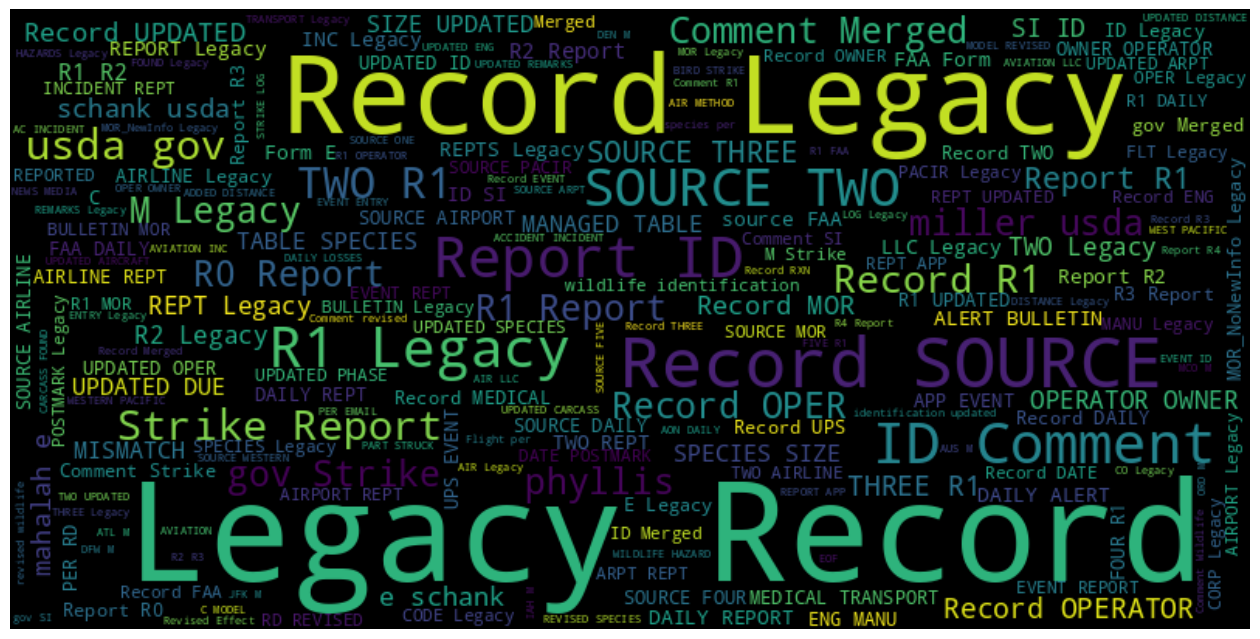

In [28]:
# Assuming df is your DataFrame with the "COMMENTS" column
comments_text = ' '.join(df['COMMENTS'].dropna().astype(str))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(comments_text)

# Plot the WordCloud image
plt.figure(figsize=(16, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## **Q13. Geospatial Analysis**

In [44]:
fig = px.scatter_geo(df,
                     lon='LONGITUDE',
                     lat='LATITUDE',
                     color='AIRCRAFT',
                     title='<i>Aircraft Types impacted by Region</i>',
                     projection='natural earth',
                     template='plotly_dark')

# Customize the map layout
fig.update_geos(
    showcoastlines=True,
    coastlinecolor="Black",
    showland=True,
    landcolor="#d1cec7"
)

fig.update_layout(legend_title_text='Aircraft Type')

fig.show()

In [30]:
-# fig = px.scatter_geo(df,
#                      lon='LONGITUDE',
#                      lat='LATITUDE',
#                      color='SPECIES',
#                      title='<i>Type of Birds impacted by Region</i>',
#                      template='plotly_dark')

# # Customize the map layout
# fig.update_geos(
#     showcoastlines=True,
#     coastlinecolor="Black",
#     showland=True,
#     landcolor="#d1cec7"
# )

# fig.update_layout(legend_title_text='Aircraft Type')


# fig.show()

SyntaxError: ignored

<center>
<img src="https://github.com/DorobantuDiana/DS_Projects/blob/main/objects/plane_take-off.gif?raw=true" width=1000>
</center>